IRIS CLASSIFICATION

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [5]:
# Load dataset
df = pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


EXPLORATORY DATA ANALYSIS (EDA)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
df.shape

(150, 5)

In [10]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [11]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

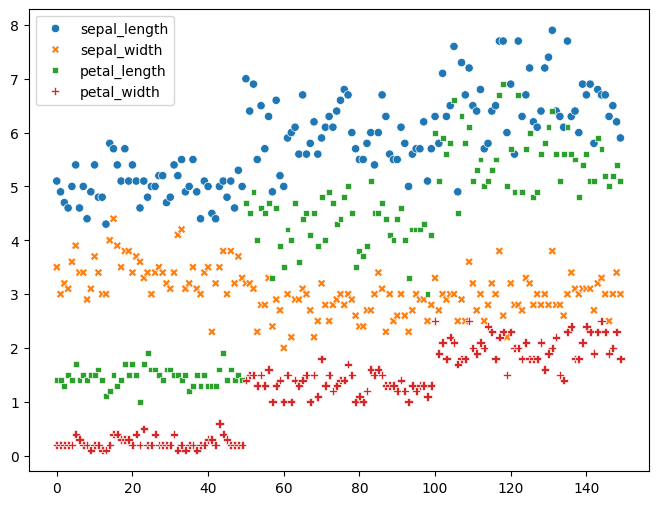

In [12]:
# scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(df)
plt.show()

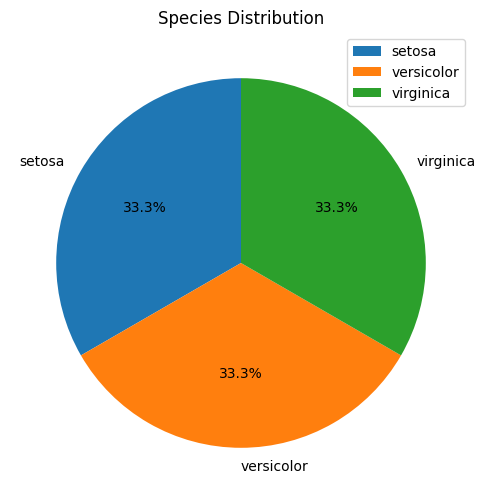

In [13]:
# Get value counts
value_counts = df['species'].value_counts()

# Create pie chart 
plt.figure(figsize=(8, 6))
value_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.ylabel('')  
plt.legend()
plt.title('Species Distribution')
plt.show()

C:\Users\abu\AppData\Local\Temp\ipykernel_900\587189278.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


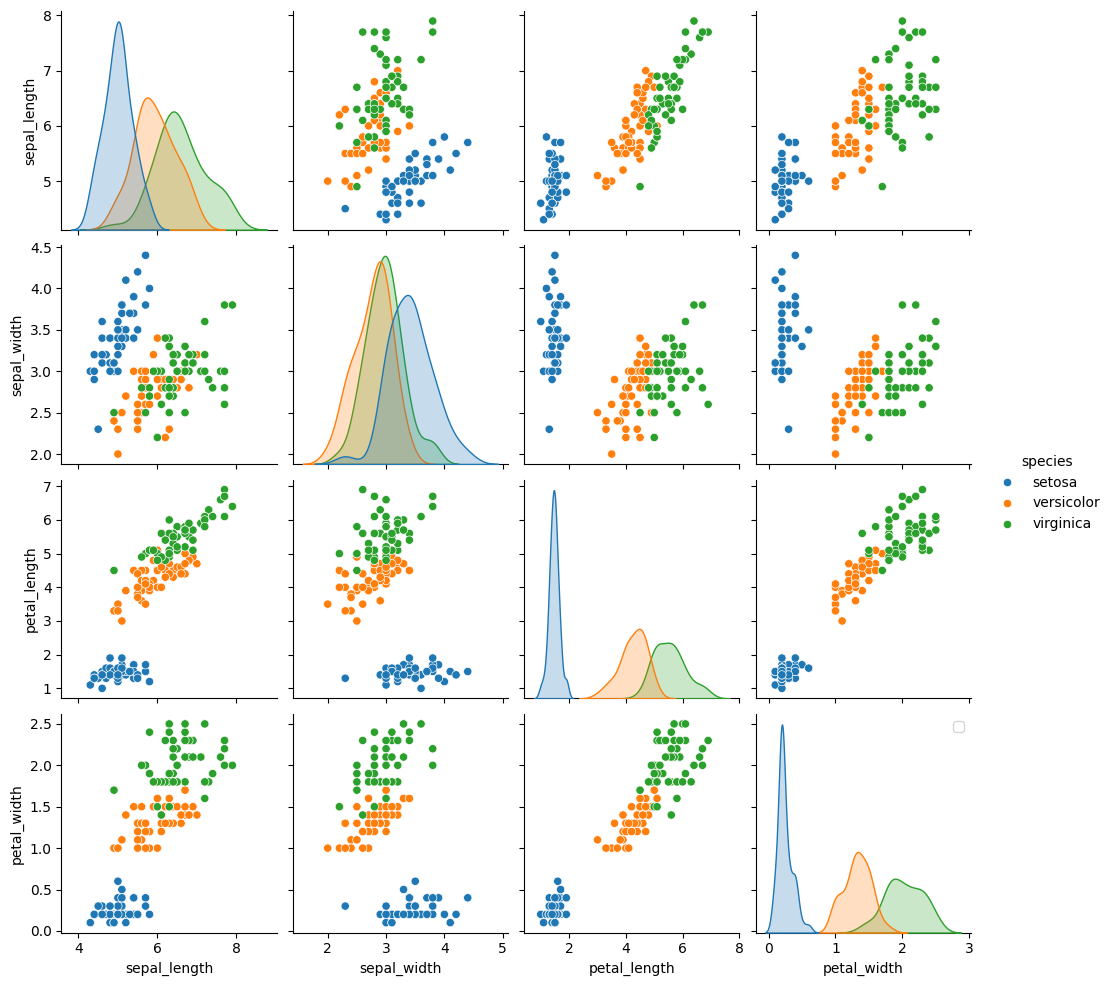

In [14]:
# pair plot
sns.pairplot(df, hue='species', vars=df.columns.drop('species'))
plt.legend()
plt.show()

C:\Users\abu\AppData\Local\Temp\ipykernel_900\1335585648.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


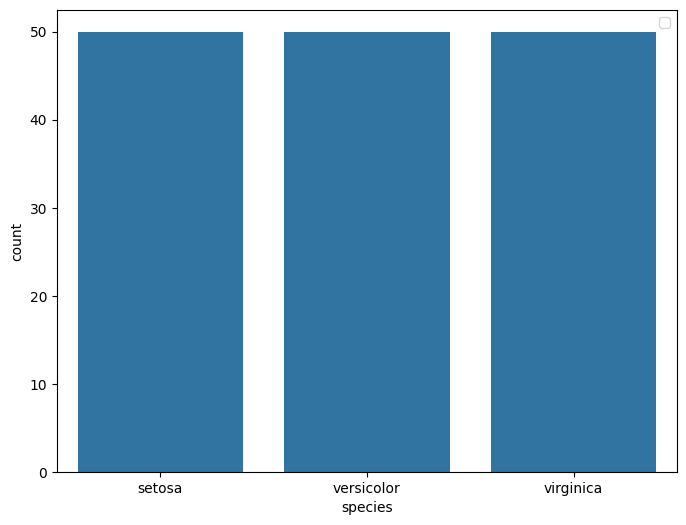

In [15]:
# bar chart
plt.figure(figsize=(8, 6))
sns.barplot(df['species'].value_counts())
plt.legend()
plt.show()

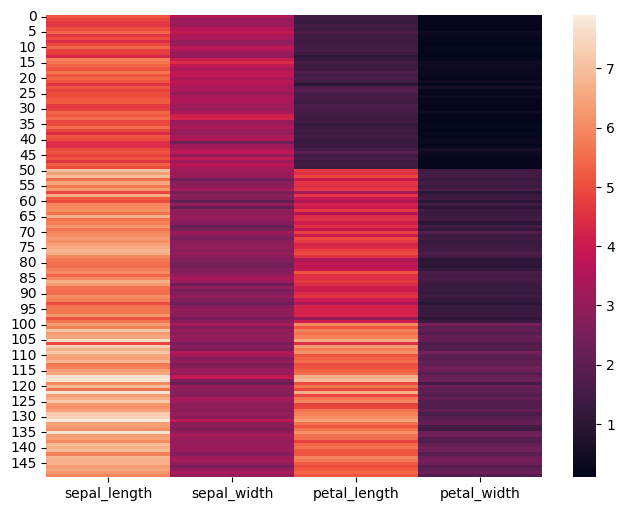

In [16]:
# heat map
plt.figure(figsize=(8, 6))
sns.heatmap(df.drop(columns=['species']))
plt.show()

MODEL BUILDING

In [17]:
# encoding
lab_enc = LabelEncoder()
df['species'] = lab_enc.fit_transform(df['species'])


In [18]:
df['species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

In [19]:
# dependet and independent columns for train test split
X = df.drop('species', axis=1)  # Features
y = df['species']  # Target variable

In [20]:
print("Depencent columns ", X)

print("Indepencent column ", y)

Depencent columns       sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
Indepencent column  0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32


In [21]:
# train test split for model training
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

In [22]:
print("Training data size: ", X_train.shape)
print("Testing data size: ", X_test.shape)

Training data size:  (120, 4)
Testing data size:  (30, 4)


In [23]:
print("Training data size: ", y_train.shape)
print("Testing data size: ", y_test.shape)

Training data size:  (120,)
Testing data size:  (30,)


MODEL TRAINING

In [24]:
# Logisticregression CV
log_cv = LogisticRegressionCV(random_state=42, max_iter=1000)
log_cv.fit(X_train, y_train)

LogisticRegressionCV(max_iter=1000, random_state=42)

MODEL EVALUATION

In [25]:
# model prediction
y_pred = log_cv.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [26]:
# Evaluate the model
log_cv_accuracy = accuracy_score(y_test, y_pred)*100
print(f"\nModel Accuracy: {log_cv_accuracy:.4f}")



Model Accuracy: 100.0000


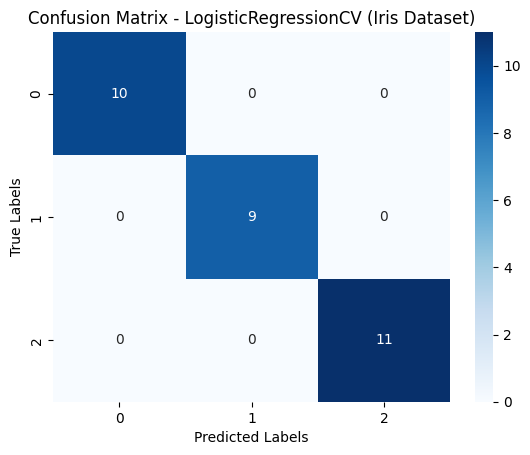

In [27]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - LogisticRegressionCV (Iris Dataset)')
plt.show()

In [28]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



KNeighborsClassifier

In [29]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [30]:
# model prediction
y_pred = knn.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [31]:
# Evaluate the model
knn_accuracy = accuracy_score(y_test, y_pred)*100
print(f"\nModel Accuracy: {knn_accuracy:.4f}")


Model Accuracy: 100.0000


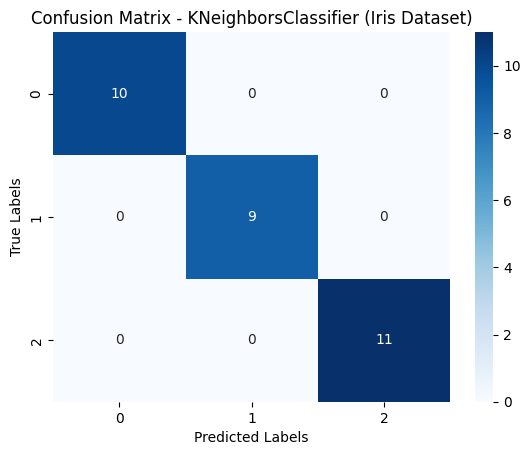

In [32]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - KNeighborsClassifier (Iris Dataset)')
plt.show()


In [33]:
print("\nClassification Report:")
cls_rept = classification_report(y_test, y_pred)
print(cls_rept)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



DECISION TREE

In [34]:
# define Decision Tree
de_tree = DecisionTreeClassifier(
    random_state=42,
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1
)

In [35]:
# train 
de_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

MODEL EVALUATION

In [36]:
# model prediction
y_pred = de_tree.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [37]:
# Evaluate the model
de_tree_accuracy = accuracy_score(y_test, y_pred)*100
print(f"\nModel Accuracy: {de_tree_accuracy:.4f}")


Model Accuracy: 100.0000


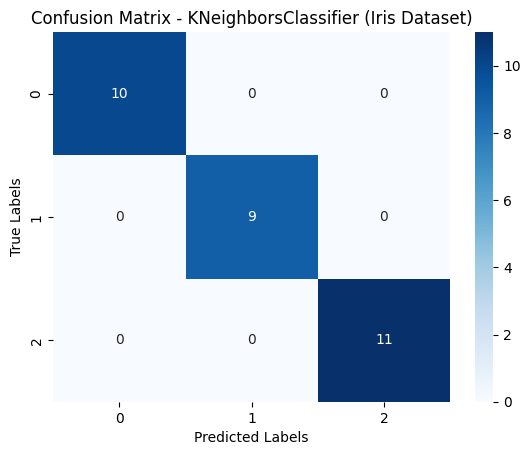

In [38]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - KNeighborsClassifier (Iris Dataset)')
plt.show()

ALL MODELS ACCURACY

In [39]:
print("LogisticRegressionCV ACCURACY = ",log_cv_accuracy)
print("Knn ACCURACY = ",knn_accuracy)
print("Decision Tree ACCURACY = ",de_tree_accuracy)

LogisticRegressionCV ACCURACY =  100.0
Knn ACCURACY =  100.0
Decision Tree ACCURACY =  100.0
